With some of the crazy and rare baseball scores lately (like 19-0 and 29-9 on the SAME DAY), I thought it would be interesting to take a look at how common/rare certain scores are in MLS. 

Looking at how common all game scores are  
Games included are 1996 through 10/11/2020

In [1]:
import os
import pandas as pd
import numpy as np
import numpy.ma as ma
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
matches_df = pd.read_csv(os.path.join('data', 'game_stats', 'matches.csv'), low_memory=False)
matches_df.columns.tolist()[:14]

['id',
 'home',
 'away',
 'date',
 'year',
 'time (utc)',
 'attendance',
 'venue',
 'league',
 'part_of_competition',
 'game_status',
 'shootout',
 'home_score',
 'away_score']

In [3]:
# Only grab certain columns
matches_df = matches_df[['id', 'home', 'away', 'date', 'year', 'part_of_competition', 'game_status', 'home_score', 'away_score']]
matches_df.head()

,id,home,away,date,year,part_of_competition,game_status,home_score,away_score
0,NaN,New England,San Jose,7/31/1996,1996,Regular Season,FT,2,0
1,NaN,Dallas,Colorado,6/15/1996,1996,Regular Season,FT,1,1
2,NaN,Colorado,D.C. United,8/29/1996,1996,Regular Season,FT,1,2
3,NaN,LA Galaxy,New England,8/8/1996,1996,Regular Season,FT,1,0
4,NaN,New England,D.C. United,7/20/1996,1996,Regular Season,FT,2,0


In [4]:
# Only want regular season games
matches_df = matches_df[ matches_df['part_of_competition'].str.contains('Regular Season')]
matches_df.part_of_competition.unique()

array(['Regular Season', ' Regular Season 2001', ' Regular Season 2002',
       ' Regular Season 2003', ' Regular Season 2004',
       ' Regular Season 2005', ' Regular Season 2006',
       ' Regular Season 2007', ' Regular Season 2008',
       ' Regular Season 2009', ' Regular Season 2010',
       ' Regular Season 2011', ' Regular Season 2012',
       ' Regular Season 2013', ' Regular Season 2014',
       ' Regular Season 2015', ' Regular Season 2016', ' Regular Season'],
      dtype=object)

In [5]:
matches_df.game_status.unique()

array(['FT', 'AET', 'Abandoned'], dtype=object)

In [6]:
# Check out what games are 'Abandoned'
matches_df[matches_df['game_status']=='Abandoned'] # remove this row

,id,home,away,date,year,part_of_competition,game_status,home_score,away_score
2306,237819.0,DC United,Houston Dynamo,"Wednesday, June 4",2008,Regular Season 2008,Abandoned,0,0


The above game didn't count in the season for points (from what I could find), so I won't keep it for the final count. 

In [7]:
matches_df = matches_df.drop(index=2306) # matches_df = matches_df[ matches_df['game_status'] != 'Abandoned' ]
matches_df[matches_df['game_status']=='Abandoned'] # should be 0 rows

,id,home,away,date,year,part_of_competition,game_status,home_score,away_score


# Winner vs Loser

Now that we have good data, it's time to get the scores matrix.  
First, I'm going to compare scores for winners vs losers. Later I'll take a look at home vs away scores. 

In [8]:
# Find the max score (for size of 2D array)
max_score = max(matches_df['home_score'].max(), matches_df['away_score'].max())
ms = max_score + 1
max_score

8

## Number of Occurrences

In [9]:
# Convert scores to matrix
scores_np = np.zeros((ms,ms), dtype=np.int32)

for i, row in matches_df.iterrows():
    if row['home_score'] > row['away_score']: # home won
        scores_np[row['home_score']][row['away_score']] += 1
    else: # draw or away won
        scores_np[row['away_score']][row['home_score']] += 1
        
scores_df = pd.DataFrame(scores_np).transpose()
scores_df

,0,1,2,3,4,5,6,7,8
0,371,982,690,354,145,36,9,3,0
1,0,674,1039,442,182,55,15,3,1
2,0,0,363,371,100,35,12,1,0
3,0,0,0,87,70,14,4,0,0
4,0,0,0,0,12,6,3,1,0
5,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0


In [10]:
# Reverse the rows so the heatmap looks better (hopefully)
scores_df = scores_df.iloc[::-1]
scores_df

,0,1,2,3,4,5,6,7,8
8,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0
4,0,0,0,0,12,6,3,1,0
3,0,0,0,87,70,14,4,0,0
2,0,0,363,371,100,35,12,1,0
1,0,674,1039,442,182,55,15,3,1
0,371,982,690,354,145,36,9,3,0


In [11]:
# Make the mask so the empty half displays differently on the heatmap
mask = np.zeros_like(scores_df)
mask[np.triu_indices_from(mask, k=1)] = True
mask = np.array(mask, dtype=np.float32)
mask = np.flip(mask, axis=1)
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
# Make the annotations (replace '0's with a '-')
annots = pd.DataFrame(scores_df, dtype=str)
for i in range(ms):
    for j in range(ms):
        if annots[i][j] == "0":
            annots[i][j] = '-'
annots

,0,1,2,3,4,5,6,7,8
8,-,-,-,-,-,-,-,-,-
7,-,-,-,-,-,-,-,-,-
6,-,-,-,-,-,-,-,-,-
5,-,-,-,-,-,1,-,-,-
4,-,-,-,-,12,6,3,1,-
3,-,-,-,87,70,14,4,-,-
2,-,-,363,371,100,35,12,1,-
1,-,674,1039,442,182,55,15,3,1
0,371,982,690,354,145,36,9,3,-


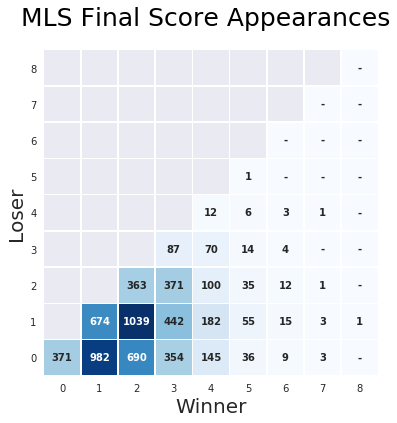

In [13]:
# Plot it as a heatmap
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(scores_df.astype(float), linewidths=0.5, annot=annots, 
                     fmt='s', mask=mask, cbar=False, cmap='Blues', annot_kws={'fontweight':'demi'})
    
plt.yticks(rotation=0)
plt.xlabel('Winner', size=20)
plt.ylabel('Loser', size=20)
plt.suptitle('MLS Final Score Appearances', size=25)
plt.savefig('graphs/scores/winner_loser_number.png', bbox_inches='tight')
plt.show()

Fairly recently on September 10th was one of the 7-1 victories when Seattle beat San Jose. That was only the 3rd time that score was recorded in MLS history and the 9th time a team has scored 7 or more goals in a game. 

On September 23rd was only the 9th time a team won 6-0 when LAFC beat Vancouver. 

On October 7th, Portland beat the LA Galaxy 6-3 for only the 4th time that score has been recorded. 

## Frequency (Percent of Total Games)

Now we're going to look at the frequencies of these scores. (The percent of times the score occurs out of all games.)  
This mainly boils down to changing the annotations (and the title and subtitle). 

In [14]:
# Make the annotations and store the percents
annots = pd.DataFrame(scores_df, dtype=str)
percents = pd.DataFrame(scores_df, dtype=float)
total_games = len(matches_df)

for i in range(ms):
    for j in range(ms):
        if annots[i][j] == "0":
            annots[i][j] = '-'
            percents[i][j] = 0.0
        else:
            annots[i][j] = str('{:.2f}'.format((float(annots[i][j]) / total_games)*100))
            percents[i][j] = 100 * float(percents[i][j] / total_games)
annots

,0,1,2,3,4,5,6,7,8
8,-,-,-,-,-,-,-,-,-
7,-,-,-,-,-,-,-,-,-
6,-,-,-,-,-,-,-,-,-
5,-,-,-,-,-,0.02,-,-,-
4,-,-,-,-,0.20,0.10,0.05,0.02,-
3,-,-,-,1.43,1.15,0.23,0.07,-,-
2,-,-,5.97,6.10,1.64,0.58,0.20,0.02,-
1,-,11.08,17.09,7.27,2.99,0.90,0.25,0.05,0.02
0,6.10,16.15,11.35,5.82,2.38,0.59,0.15,0.05,-


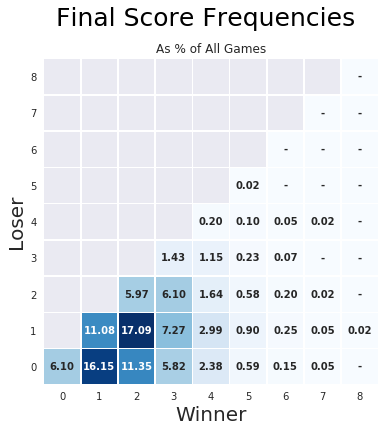

In [15]:
# Plot it as a heatmap

with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(scores_df.astype(float), linewidths=0.5, annot=annots, 
                     fmt='s', mask=mask, cbar=False, cmap='Blues', annot_kws={'fontweight':'demi'})
    
plt.yticks(rotation=0)
plt.xlabel('Winner', size=20)
plt.ylabel('Loser', size=20)
plt.suptitle('Final Score Frequencies', size=25, y=1)
plt.title('As % of All Games')
plt.savefig('graphs/scores/winner_loser_freq.png', bbox_inches='tight')
plt.show()

# Home vs Away

Now to basically repeat the process, but now we're going to look at scores of the home team vs the away team. 

## Number of Occurrences

In [16]:
# Do it again but with home and away instead of winner and loser
scores_ha = np.zeros((ms,ms), dtype=np.int32)

for i, row in matches_df.iterrows(): 
    scores_ha[row['home_score']][row['away_score']] += 1
scores_df = pd.DataFrame(scores_ha).transpose()
scores_df = scores_df.iloc[::-1]
scores_df

,0,1,2,3,4,5,6,7,8
8,0,1,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0
6,1,3,4,2,1,0,0,0,0
5,7,13,13,6,2,1,0,0,0
4,26,41,28,18,12,4,2,1,0
3,81,139,120,87,52,8,2,0,0
2,200,359,363,251,72,22,8,1,0
1,374,674,680,303,141,42,12,3,0
0,371,608,490,273,119,29,8,2,0


In [17]:
# Make the annotations
annots = pd.DataFrame(scores_df, dtype=str)
for i in range(ms):
    for j in range(ms):
        if annots[i][j] == "0":
            annots[i][j] = '-'
annots

,0,1,2,3,4,5,6,7,8
8,-,1,-,-,-,-,-,-,-
7,1,-,-,-,-,-,-,-,-
6,1,3,4,2,1,-,-,-,-
5,7,13,13,6,2,1,-,-,-
4,26,41,28,18,12,4,2,1,-
3,81,139,120,87,52,8,2,-,-
2,200,359,363,251,72,22,8,1,-
1,374,674,680,303,141,42,12,3,-
0,371,608,490,273,119,29,8,2,-


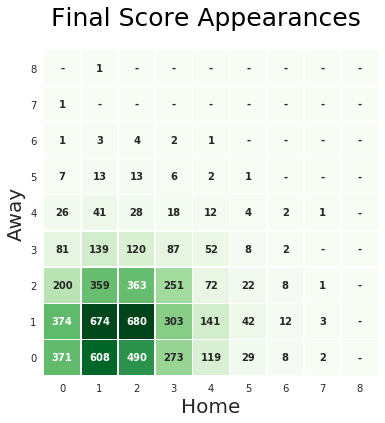

In [18]:
# Note: We don't need a mask this time since we're not forcing the data to 
#       half of the 2D array

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(scores_df, linewidths=0.5, annot=annots, 
                     fmt='s', cbar=False, cmap='Greens', annot_kws={'fontweight':'demi'})
    
plt.yticks(rotation=0)
plt.xlabel('Home', size=20)
plt.ylabel('Away', size=20)
plt.suptitle('Final Score Appearances', size=25)
plt.savefig('graphs/scores/home_away_number.png', bbox_inches='tight')
plt.show()

## Frequency (Percent of Total Games)

In [19]:
# Make the annotations
annots = pd.DataFrame(scores_df, dtype=str)
total_games = len(matches_df)

for i in range(ms):
    for j in range(ms):
        if annots[i][j] == "0":
            annots[i][j] = '-'
        else:
            annots[i][j] = str('{:.2f}'.format((float(annots[i][j]) / total_games)*100))

annots

,0,1,2,3,4,5,6,7,8
8,-,0.02,-,-,-,-,-,-,-
7,0.02,-,-,-,-,-,-,-,-
6,0.02,0.05,0.07,0.03,0.02,-,-,-,-
5,0.12,0.21,0.21,0.10,0.03,0.02,-,-,-
4,0.43,0.67,0.46,0.30,0.20,0.07,0.03,0.02,-
3,1.33,2.29,1.97,1.43,0.86,0.13,0.03,-,-
2,3.29,5.90,5.97,4.13,1.18,0.36,0.13,0.02,-
1,6.15,11.08,11.18,4.98,2.32,0.69,0.20,0.05,-
0,6.10,10.00,8.06,4.49,1.96,0.48,0.13,0.03,-


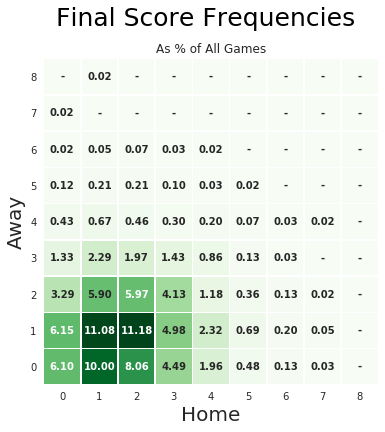

In [20]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(scores_df, linewidths=0.5, annot=annots, 
                     fmt='s', cbar=False, cmap='Greens', annot_kws={'fontweight':'demi'})
    
plt.yticks(rotation=0)
plt.xlabel('Home', size=20)
plt.ylabel('Away', size=20)
plt.suptitle('Final Score Frequencies', size=25, y=1)
plt.title('As % of All Games')
plt.savefig('graphs/scores/home_away_freq.png', bbox_inches='tight')
plt.show()

## (Light) Score Percentage Analysis

In [26]:
# Percents for games in which a certain number of goals isn't exceeded by either team
for under in range(1, ms): # 1 through 8
    per_un = 0.0
    for i in range(under+1): # 0 through under (want it to include under as well)
        for j in range(under+1): # 0 through under
            per_un += percents.loc[i, j]
    print('{:.4f}% of games feature neither team scoring over {} goals'.format(per_un, under))

33.3333% of games feature neither team scoring over 1 goals
67.7356% of games feature neither team scoring over 2 goals
88.3572% of games feature neither team scoring over 3 goals
96.7275% of games feature neither team scoring over 4 goals
99.1449% of games feature neither team scoring over 5 goals
99.8520% of games feature neither team scoring over 6 goals
99.9836% of games feature neither team scoring over 7 goals
100.0000% of games feature neither team scoring over 8 goals


Even though many consider MLS to be a high scoring league, a third of the games played have featured neither team scoring more than one goal and just over two-thirds have featured neither team scoring more than two goals. (as of 10/13/2020)  
It will be interesting to see how these numbers compare to other leagues. 

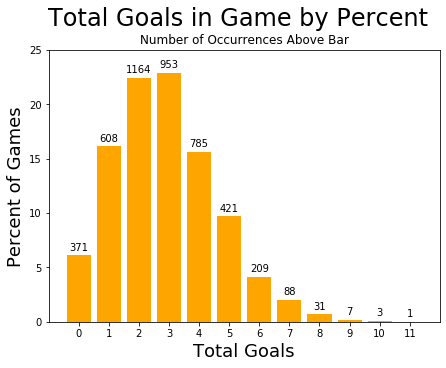

In [22]:
# Percents for total goals in a game
total_goals = {}
total_goals_p = {}
for i in range(len(percents)):
    for j in range(len(percents)):
        if percents.loc[i,j] == 0.0: continue
        if i + j not in total_goals:
            total_goals[i+j] = 0
            total_goals_p[i+j] = 0.0
        total_goals_p[i+j] += percents.loc[i,j]
        total_goals[i+j] += scores_df.loc[i,j]

tg_s = pd.Series(total_goals_p)
fig, ax = plt.subplots(figsize=(7,5))
rects = plt.bar(tg_s.index, height=tg_s, color='orange')
plt.xlabel('Total Goals', size=18)
plt.ylabel('Percent of Games', size=18)
plt.suptitle('Total Goals in Game by Percent', size=24, y=1)
plt.title('Number of Occurrences Above Bar')
plt.xticks(range(0,12),range(0,12))
plt.yticks(range(0,26,5), range(0,26,5))

# https://matplotlib.org/3.3.2/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
# ^ helpful for getting labels on a bar graph
for i, rect in enumerate(rects):
    ax.annotate(total_goals[i], xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()), 
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    #ax.annotate('{:.2f}'.format(total_goals_p[i]), xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()), 
     #           xytext=(0, 14), textcoords="offset points", ha='center', va='bottom')
plt.savefig('graphs/scores/total_goals_bar.png', bbox_inches='tight')
plt.show()

In [27]:
# Todo
# Add a veersion of the above graph with the number above being the rolling %

Hopefully you enjoyed this little exploration into MLS scores! If I think of more explorations in the same vein, I'll add them to this notebook. 

Let me know if you have any suggestions to make the graphs look better or next steps to take in this analysis. 

In [23]:
# Next Up: Do This for the Premier League and La Liga
# Compare the three leagues